## Load Image Data 

In [14]:
import h5py
import numpy as np
import os
import cv2

# List your folder paths here
mat_folder_paths = [
    '/Users/kelsey/Downloads/brainTumorDataPublic_1',
    '/Users/kelsey/Downloads/brainTumorDataPublic_2',
    '/Users/kelsey/Downloads/brainTumorDataPublic_3',
    '/Users/kelsey/Downloads/brainTumorDataPublic_4'
]

# Desired image size
img_size = (224, 224)

# Initialize lists to store data
images, labels, masks = [], [], []

for mat_folder_path in mat_folder_paths:
    for filename in os.listdir(mat_folder_path):
        if filename.endswith('.mat'):
            file_path = os.path.join(mat_folder_path, filename)

            with h5py.File(file_path, 'r') as mat:
                # Extract data
                image = np.array(mat['cjdata']['image'])
                label = int(np.array(mat['cjdata']['label'])[0,0]) 
                tumor_mask = np.array(mat['cjdata']['tumorMask'])

                # Transpose arrays due to MATLAB's column-major order
                image = np.transpose(image)
                tumor_mask = np.transpose(tumor_mask)

                # Resize images and masks
                image_resized = cv2.resize(image, img_size)
                mask_resized = cv2.resize(tumor_mask.astype(np.uint8), img_size, interpolation=cv2.INTER_NEAREST)

                # Normalize image to [0, 1]
                image_normalized = image_resized.astype(np.float32) / 255.0

                # Append to lists
                images.append(image_normalized)
                labels.append(label)
                masks.append(mask_resized)

# Convert to NumPy arrays
images = np.expand_dims(np.array(images), axis=-1)
labels = np.array(labels)
masks = np.expand_dims(np.array(masks), axis=-1)

print(f'Loaded {len(images)} images.')


Loaded 3064 images.


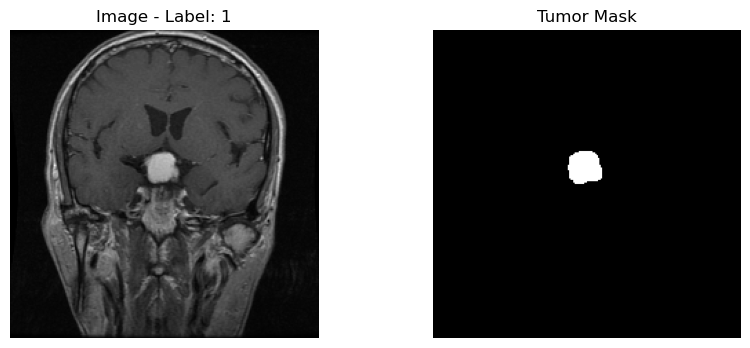

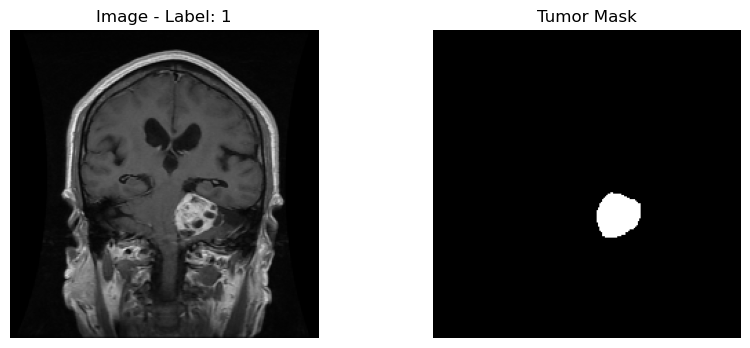

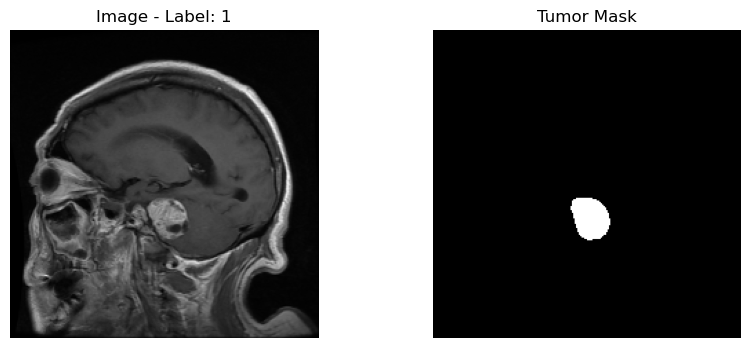

In [15]:

import matplotlib.pyplot as plt

# Function to visualize image and mask
def visualize_data(images, labels, masks, index=0):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title(f"Image - Label: {labels[index]}")
    plt.imshow(images[index].squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Tumor Mask")
    plt.imshow(masks[index].squeeze(), cmap='gray')
    plt.axis('off')

    plt.show()

# Visualize first few images
visualize_data(images, labels, masks, index=0) 
visualize_data(images, labels, masks, index=1) 
visualize_data(images, labels, masks, index=2) 


In [24]:
images[0].shape

(224, 224, 1)

## Visualize each type of brain tumor 

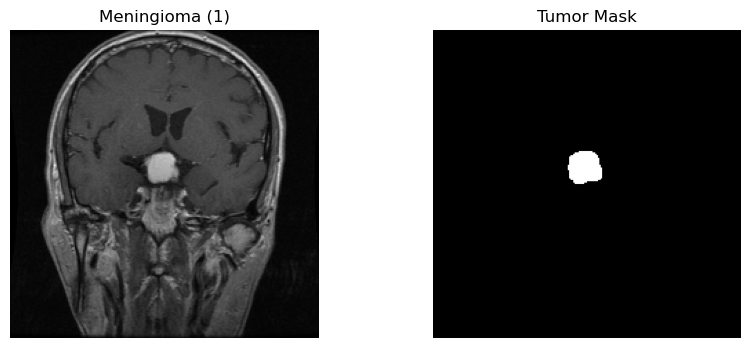

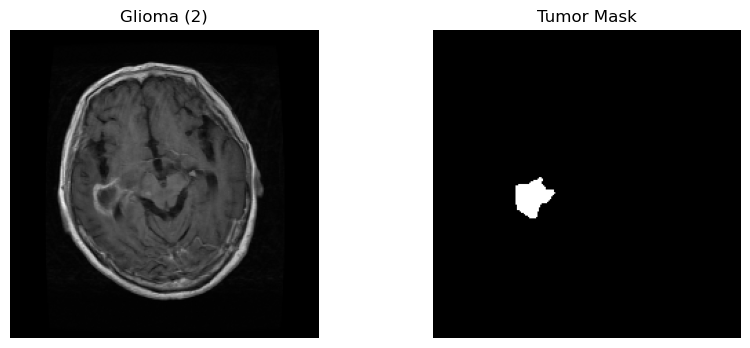

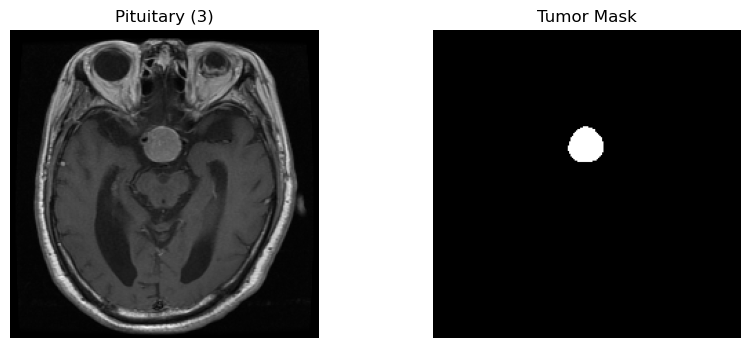

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Map labels to tumor types
label_names = {1: 'Meningioma (1)', 2: 'Glioma (2)', 3: 'Pituitary (3)'}

# Find indices for first occurrence of each tumor type
unique_labels = np.unique(labels)
first_indices = [np.where(labels == label)[0][0] for label in unique_labels]

# Visualize each type
for idx in first_indices:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title(f'{label_names[labels[idx]]}')
    plt.imshow(images[idx].squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Tumor Mask')
    plt.imshow(masks[idx].squeeze(), cmap='gray')
    plt.axis('off')

    plt.show()


In [16]:
np.unique(labels, return_counts=True)

(array([1, 2, 3]), array([ 708, 1426,  930]))

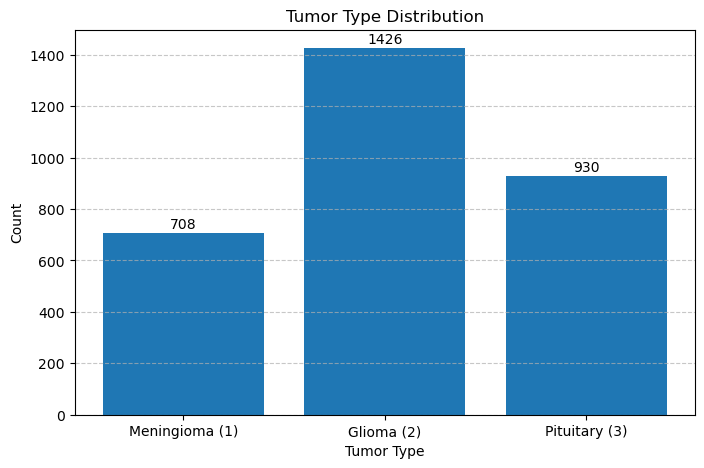

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Map numeric labels to tumor names
label_names = {1: 'Meningioma (1)', 2: 'Glioma (2)', 3: 'Pituitary (3)'}

# Count occurrences of each label
unique_labels, counts = np.unique(labels, return_counts=True)
tumor_types = [label_names[label] for label in unique_labels]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(tumor_types, counts)
plt.title('Tumor Type Distribution')
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(count),
             ha='center', va='bottom', fontsize=10)

plt.show()

